In [21]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets
import sklearn.metrics

# import functions
import autosklearn.classification
import autosklearn.metrics
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
import pickle

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets
import sklearn.metrics

# Load Data

load the training and test data in a format specified by task description

In [1]:
with open("./Dataset/x_test.txt") as file:
    X_test = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/x_train.txt") as file:
    X_train = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/y_train.txt") as file:
    y_train = [[float(digit) for digit in line.split()] for line in file]

In the X_test there are 500 features and 5000 observations, y_train contains 5000 values, X_train contains 500 features and 5000 observations

In [23]:
print("X_test datapoints:", len(X_test), " features:", len(X_test[0]))
print("X_train datapoints:", len(X_train), " features:", len(X_train[0]))
print("y_train datapoints:", len(y_train))

X_test datapoints: 5000  features: 500
X_train datapoints: 5000  features: 500
y_train datapoints: 5000


In [14]:
def getScoreLimited(y_true, y_pred):
    """Get score based on y_true, y_pred and number of feature used

    Scoring function, based on which, the best model is selected.
    Score is calculated according to task description: +10 points for each
    correctly classified positive class, -200 points for each feature used
    """

    amounToTake = int(0.45 * len(y_true[y_true == 1]))

    df = pd.DataFrame(y_pred[:, 1], columns=["result"])
    sortedDf = df.sort_values(by="result", ascending=False).head(amounToTake)

    y_predicted = np.zeros_like(y_true)

    y_predicted[sortedDf.index] = 1

    score = 0

    correct = 0

    for i, y in enumerate(y_true):
        if y == 1 and y == y_predicted[i]:
            correct += 1

    score = 10 * correct - 200 * 2
    print(correct)
    return score / (amounToTake * 10 - 400)

# Auto

In [5]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import (
    SelectKBest,
    RFE,
    RFECV,
    SelectFpr,
    SelectFdr,
    SelectFwe,
    mutual_info_classif,
)
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler

selector = SelectKBest(k=2, score_func=mutual_info_classif)

X_new = selector.fit_transform(X_train, y_train_ravel)
X_new = RobustScaler().fit_transform(X_new, y_train_ravel)
X_t, X_te, y_t, y_te = train_test_split(
    X_new, y_train_ravel, random_state=42, test_size=0.33
)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import (
    SelectKBest,
    RFE,
    RFECV,
    SelectFpr,
    SelectFdr,
    SelectFwe,
    mutual_info_classif,
)
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler

selector = SelectKBest(k=2, score_func=mutual_info_classif)

X_new = selector.fit_transform(X_train, y_train_ravel)
X_new = RobustScaler().fit_transform(X_new, y_train_ravel)
X_t, X_te, y_t, y_te = train_test_split(
    X_new, y_train_ravel, random_state=42, test_size=0.33
)

accuracy_scorer = autosklearn.metrics.make_scorer(
    name="accu",
    score_func=getScoreLimited,
    optimum=1,
    greater_is_better=True,
    needs_proba=True,
    needs_threshold=False,
)

NameError: name 'autosklearn' is not defined

## V2

In [27]:
automl = AutoSklearn2Classifier(
    time_left_for_this_task=86400,
    delete_tmp_folder_after_terminate=False,
    metric=autosklearn.metrics.roc_auc,
    seed=42,
)
pd.DataFrame.iteritems = pd.DataFrame.items

automl.fit(X_t, y_t, dataset_name="project")

/home/patryk/advml-proj-2/.venv/lib/python3.9/site-packages/smac/intensification/parallel_scheduling.py:153: UserWarning: SuccessiveHalving is executed with 1 workers only. Consider to use pynisher to use all available workers.
  warnings.warn(


[WARNING] [2024-05-31 21:57:11,474:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2024-05-31 21:57:13,052:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2024-05-31 21:57:14,780:Client-EnsembleBuilder] No runs were available to build an ensemble from


AutoSklearn2Classifier(delete_tmp_folder_after_terminate=False, metric=roc_auc,
                       per_run_time_limit=8640, seed=42,
                       time_left_for_this_task=86400)

In [33]:
with open("automl", "wb") as handle:
    pickle.dump(automl, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
266,1,0.02,extra_trees,0.454597,3.751207
3741,2,0.02,gradient_boosting,0.456541,10.845509
2660,3,0.02,extra_trees,0.456661,11.242523
3604,4,0.22,extra_trees,0.457807,10.978043
5613,5,0.12,extra_trees,0.457955,10.410265
1363,6,0.04,random_forest,0.458863,13.996343
623,7,0.10,random_forest,0.459424,14.516405
850,8,0.12,random_forest,0.459714,13.652030
1577,9,0.04,random_forest,0.460203,14.626425


In [29]:
automl.show_models()

{266: {'model_id': 266,
  'rank': 1,
  'cost': 0.4545966860994596,
  'ensemble_weight': 0.020000000000000004,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f22d85f6df0>,
  'balancing': Balancing(random_state=42, strategy='weighting'),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f22d06176a0>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f22d0617a60>,
  'sklearn_classifier': None},
 474: {'model_id': 474,
  'rank': 2,
  'cost': 0.46174223539367965,
  'ensemble_weight': 0.04000000000000001,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f22d1551c40>,
  'balancing': Balancing(random_state=42),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f22e1c58700>,
  'classifier': <autosklearn.pipeline.components.c

In [ ]:
ypred = automl.predict_proba(X_te)

In [31]:
getScoreLimited(y_te, ypred)

0.5107033639143731

In [21]:
import functions

activation = ["relu"]


solver = ["adam"]
alpha = [0.3]
learning_rate = ["adaptive"]
learning_rate_init = [0.008]
hidden_layer_sizes = [
    (13,),
]
max_iter = [1600]
random_state = [42]
mlpClassifierParameters = functions.generateParameters(
    [
        activation,
        solver,
        alpha,
        learning_rate,
        learning_rate_init,
        hidden_layer_sizes,
        max_iter,
        random_state,
    ],
    globals(),
)

clf = functions.MLPClassifier(**mlpClassifierParameters[0])

In [22]:
clf.fit(X_t, y_t)
ypred = clf.predict_proba(X_te)
getScoreLimited(y_te, ypred)

227


0.5718654434250765

In [32]:
automl.cv_results_["params"][np.argmax(automl.cv_results_["mean_test_score"])]

{'balancing:strategy': 'weighting',
 'classifier:__choice__': 'random_forest',
 'data_preprocessor:__choice__': 'feature_type',
 'feature_preprocessor:__choice__': 'no_preprocessing',
 'classifier:random_forest:bootstrap': 'True',
 'classifier:random_forest:criterion': 'gini',
 'classifier:random_forest:max_depth': 'None',
 'classifier:random_forest:max_features': 0.42897298723978594,
 'classifier:random_forest:max_leaf_nodes': 'None',
 'classifier:random_forest:min_impurity_decrease': 0.0,
 'classifier:random_forest:min_samples_leaf': 4,
 'classifier:random_forest:min_samples_split': 8,
 'classifier:random_forest:min_weight_fraction_leaf': 0.0,
 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'robust_scaler',
 'data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max': 0.7245017410340228,
 'data_preprocessor:feature_type:numerical_transformer:resc

## V1

In [7]:
automl1 = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=86400,
    delete_tmp_folder_after_terminate=False,
    metric=accuracy_scorer,
    seed=42,
)
pd.DataFrame.iteritems = pd.DataFrame.items
automl1.fit(X_t, y_t, dataset_name="project")

[WARNING] [2024-05-30 19:55:26,701:Client-AutoMLSMBO(42)::project] Could not find meta-data directory /home/patryk/advml-proj-2/.venv/lib/python3.9/site-packages/autosklearn/metalearning/files/accu_binary.classification_dense


AutoSklearnClassifier(delete_tmp_folder_after_terminate=False,
                      ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      metric=accu, per_run_time_limit=8640, seed=42,
                      time_left_for_this_task=86400)

In [19]:
with open("automl1_cv_results", "wb") as handle:
    pickle.dump(automl1.cv_results_, handle, protocol=pickle.HIGHEST_PROTOCOL)
automl1.cv_results_["params"][np.argmax(automl1.cv_results_["mean_test_score"])]

{'balancing:strategy': 'weighting',
 'classifier:__choice__': 'random_forest',
 'data_preprocessor:__choice__': 'feature_type',
 'feature_preprocessor:__choice__': 'feature_agglomeration',
 'classifier:random_forest:bootstrap': 'False',
 'classifier:random_forest:criterion': 'entropy',
 'classifier:random_forest:max_depth': 'None',
 'classifier:random_forest:max_features': 0.07337149259004479,
 'classifier:random_forest:max_leaf_nodes': 'None',
 'classifier:random_forest:min_impurity_decrease': 0.0,
 'classifier:random_forest:min_samples_leaf': 2,
 'classifier:random_forest:min_samples_split': 3,
 'classifier:random_forest:min_weight_fraction_leaf': 0.0,
 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median',
 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'quantile_transformer',
 'feature_preprocessor:feature_agglomeration:affinity': 'cosine',
 'feature_preprocessor:feature_agglomeration:linkage': 'complete',
 'feature_prepr

In [10]:
ypred = automl1.predict_proba(X_te)
getScoreLimited(y_te, ypred)

0.4648318042813456

In [20]:
with open("automl1", "wb") as handle:
    pickle.dump(automl1, handle, protocol=pickle.HIGHEST_PROTOCOL)
automl1.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
3216,3,0.08,random_forest,0.464115,6.219970
3226,4,0.04,random_forest,0.464115,6.415127
3242,5,0.08,random_forest,0.464115,6.008976
3258,6,0.04,random_forest,0.464115,6.162707
3280,1,0.04,random_forest,0.464115,5.958490
3284,8,0.02,random_forest,0.464115,6.149242
3379,9,0.04,random_forest,0.464115,5.959869
3405,10,0.02,random_forest,0.464115,5.980761
3472,7,0.04,random_forest,0.464115,6.029026


/home/patryk/advml-proj-2/.venv/lib/python3.9/site-packages/autosklearn/automl.py:1860: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.merge(


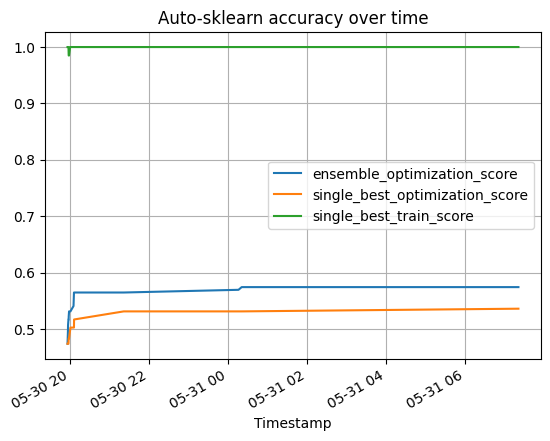

In [14]:
automl1.performance_over_time_.plot(
    x="Timestamp",
    kind="line",
    legend=True,
    title="Auto-sklearn accuracy over time",
    grid=True,
)
plt.show()

In [15]:
automl1.show_models()

{564: {'model_id': 564,
  'rank': 1,
  'cost': 0.4688995215311005,
  'ensemble_weight': 0.04,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f22f7e3c220>,
  'balancing': Balancing(random_state=42),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f22f795e1c0>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f22f795e370>,
  'sklearn_classifier': RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=1,
                         min_samples_split=4, n_estimators=512, n_jobs=1,
                         random_state=42, warm_start=True)},
 1107: {'model_id': 1107,
  'rank': 2,
  'cost': 0.4736842105263158,
  'ensemble_weight': 0.08,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f22f7ee1460>,
  'balancing': Balancing(random_state=42, strategy='weighting'),
  

In [16]:
automl1.sprint_statistics()

'auto-sklearn results:\n  Dataset name: project\n  Metric: accu\n  Best validation score: 0.535885\n  Number of target algorithm runs: 5687\n  Number of successful target algorithm runs: 4129\n  Number of crashed target algorithm runs: 1558\n  Number of target algorithms that exceeded the time limit: 0\n  Number of target algorithms that exceeded the memory limit: 0\n'